In [114]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# LAB 3 - Ekstrakcja podstawowych parametrów geometrycznych na obrazach binarnych

In [115]:
class ImagesToAnalyse:
    def __init__(self, imSrc):
        self.sourceImage = imSrc
        self.grayImage = self.makeImageGray()
        self.binImage = self.makeImageBin()
        self.EdgeClear = self.clear(self.binImage)
        self.ObjectFill = self.fill(self.binImage)
        (self.numberOfElements, self.labeledArray) = self.bwlabel(self.binImage)

    def makeImageGray(self):
        return cv2.cvtColor(self.sourceImage, cv2.COLOR_BGR2GRAY)

    def makeImageBin(self):
        (tmp_thresh, tmp_bin) = cv2.threshold(self.grayImage, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        return tmp_bin
    
    def areaOfObject(self, objectToCalc):
        return np.count_nonzero(objectToCalc == 1)

    def bwlabel(self, srcImage):
        (numLabels, labels, stats, centroids) = cv2.connectedComponentsWithStats(srcImage)
        #numLabels to liczba obiektów + tło
        #labels to macierz indeksów obrazów
        #stats ?
        #centroids to środki ciężkości obiektów
        return numLabels, labels

    def getElementWithId(self, IDofEL):
        return (self.labeledArray == IDofEL)*1

    def fill(self, srcImage):
        negateImg = np.invert(srcImage)
        clearedInv = self.clear(negateImg)
        filledResult = cv2.bitwise_or(srcImage, clearedInv)
        return filledResult

    def clear(self, srcImage):
        kernel = np.ones((3, 3), np.uint8)
        base = srcImage.copy()
        [dx, dy] = base.shape
        operator = base.copy()
        operator[1:dx - 1, 1:dy - 1] = 0

        while True:
            oldOperator = operator.copy()
            operator = cv2.dilate(operator, kernel, iterations=1)
            operator = cv2.bitwise_and(operator, base)

            if (np.array_equal(operator, oldOperator)):
                result = operator
                break

        cleared = cv2.bitwise_xor(result, srcImage)
        return cleared

Pole = 3259


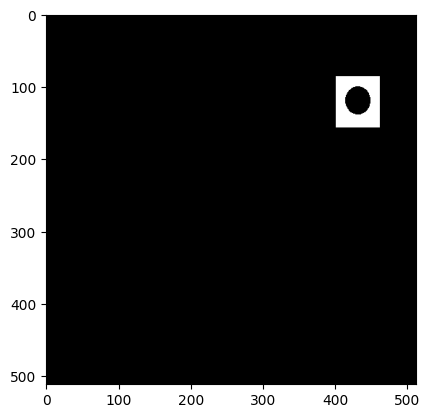

In [116]:
def zapisz_tablice_do_pliku(tablica, nazwa_pliku):
    with open(nazwa_pliku, "w") as plik:
        for wiersz in tablica:
            plik.write(" ".join(str(elem) for elem in wiersz) + "\n")


SourceImage = ImagesToAnalyse(cv2.imread("./SRC2.bmp"))
zapisz_tablice_do_pliku(SourceImage.getElementWithId(2), "tablica.txt")
plt.imshow(SourceImage.getElementWithId(2), cmap='gray', vmin=0, vmax=1)
print("Pole = " + str(SourceImage.areaOfObject(SourceImage.getElementWithId(2))))